# Longest Common Subsequence, Completed

## The Recurrence

```
LLCS(A, B, n, m):
  if n = 0 or m = 0:
    return 0
  else if A[n] = B[m]:
    return 1 + LLCS(A, B, n-1, m-1)
  else:
    return max(LLCS(A, B, n-1, m), LLCS(A, B, n, m-1))
```

## Naive Version

In [1]:
from cs103 import *

# Let's write longest common subsequence together!
# Note that we compute an abstraction of lcs, the LENGTH 
# of the longest common subsequence.
def llcs(a, b):
    if len(a) == 0 or len(b) == 0:
        return 0
    elif a[-1] == b[-1]:
        return llcs(a[:-1], b[:-1]) + 1
    else:
        return max(llcs(a[:-1], b), llcs(a, b[:-1]))
        
start_testing()

expect(llcs("", ""), 0)
expect(llcs("a", "b"), 0)
expect(llcs("a", "a"), 1)
expect(llcs("ab", "a"), 1)
expect(llcs("tycoon", "country"), 3)
expect(llcs("country", "tycoon"), 3)
# Unrunnable with this implementation.
#expect(llcs("aqwvvventvxwhngnsyloqpbkqrugyfvjzfdzjlxblncmduozm" +
#            "goofqtrpjfwytvzxaurshpzhihyyvyghocainojqfdqsbldpinb",
#            "lxtjvcdmxknxocvtwnndokuyjxulkezfrkbowssenzvbbvtzk" +
#            "kokjctedbqfmiwmeckajufytfzrcribynzlcsfvgsjiobzcqisd"),
#       33)

summary()

6 of 6 tests passed


# Memoized Version

Note that we compute an abstraction of LCS (the length of the LCS) in the table and then use the table to extract the actual LCS. Our original recurrence also targets this abstraction, *not* the actual LCS.

The conversion to a memoized computation of LCS doesn't require any particular insight. However, the `explain` function does require us to understand how and why our recurrence was constructed in order to reconstruct the concrete meaning (for the LCS, not the length of the LCS) of each piece of the recurrence.

In [2]:
from cs103 import *

# Let's write longest common subsequence together!
def lcs(a, b):
    def llcs(n, m):
        # Have we not yet computed the answer for these 
        # parameters?
        if Table[n][m] is None:
            if n == 0 or m == 0:
                Table[n][m] = 0
            elif a[n-1] == b[m-1]:
                Table[n][m] = llcs(n-1, m-1) + 1
            else:
                Table[n][m] = max(llcs(n-1, m), llcs(n, m-1))
        # By now we HAVE computed the answer for these parameters.
        return Table[n][m]
    
    def explain(n, m):
        if n == 0 or m == 0:
            return ""
        elif a[n-1] == b[m-1]:
            return explain(n-1, m-1) + a[n-1]
        else:
            if llcs(n-1, m) > llcs(n, m-1):
                return explain(n-1, m)
            else:
                return explain(n, m-1)

    Table = [[None for i in range(len(b) + 1)]
             for j in range(len(a) + 1)]
        
    # We don't need the return value of this call.
    # Instead, we just need it to populate the table.
    llcs(len(a), len(b))
    
    # Then, we explain the table entry representing the 
    # full problem.
    return explain(len(a), len(b))
        
start_testing()

expect(lcs("", ""), "")
expect(lcs("a", "b"), "")
expect(lcs("a", "a"), "a")
expect(lcs("ab", "a"), "a")
expect(lcs("tycoon", "country"), "con")
expect(lcs("country", "tycoon"), "con")
expect(lcs("aqwvvventvxwhngnsyloqpbkqrugyfvjzfdzjlxblncmduozm" +
           "goofqtrpjfwytvzxaurshpzhihyyvyghocainojqfdqsbldpinb",
           "lxtjvcdmxknxocvtwnndokuyjxulkezfrkbowssenzvbbvtzk" +
           "kokjctedbqfmiwmeckajufytfzrcribynzlcsfvgsjiobzcqisd"),
       'tvxwnnokuyjzfboztjfwytzriyvgioqsd')

summary()

7 of 7 tests passed


## Dynamic Programming

The key insight here was in choosing an order to solve subproblems.

In [3]:
from cs103 import *

# Let's write longest common subsequence together!
def lcs(a, b):
    def explain(n, m):
        if n == 0 or m == 0:
            return ""
        elif a[n-1] == b[m-1]:
            return explain(n-1, m-1) + a[n-1]
        else:
            if Table[n-1][m] > Table[n][m-1]:
                return explain(n-1, m)
            else:
                return explain(n, m-1)

    Table = [[None for i in range(len(b) + 1)]
             for j in range(len(a) + 1)]
    
    for i in range(len(a) + 1):
        for j in range(len(b) + 1):
            if i == 0 or j == 0:
                Table[i][j] = 0
            elif a[i-1] == b[j-1]:
                Table[i][j] = Table[i-1][j-1] + 1
            else:
                Table[i][j] = max(Table[i-1][j], Table[i][j-1])
    
    return explain(len(a), len(b))
        
start_testing()

expect(lcs("", ""), "")
expect(lcs("a", "b"), "")
expect(lcs("a", "a"), "a")
expect(lcs("ab", "a"), "a")
expect(lcs("tycoon", "country"), "con")
expect(lcs("country", "tycoon"), "con")
expect(lcs("aqwvvventvxwhngnsyloqpbkqrugyfvjzfdzjlxblncmduozm" +
           "goofqtrpjfwytvzxaurshpzhihyyvyghocainojqfdqsbldpinb",
           "lxtjvcdmxknxocvtwnndokuyjxulkezfrkbowssenzvbbvtzk" +
           "kokjctedbqfmiwmeckajufytfzrcribynzlcsfvgsjiobzcqisd"),
       'tvxwnnokuyjzfboztjfwytzriyvgioqsd')

summary()

7 of 7 tests passed


## Dynamic Programming, $O(n)$ Memory

We'll go back to computing `llcs` rather than `lcs`.

In [4]:
from cs103 import *

# Let's write longest common subsequence together!
def llcs(a, b):
    if len(a) > len(b):
        # Swap the two strings so we know b is at least
        # as long as a, i.e., m >= n.
        temp = a
        a = b
        b = temp
        
    # Store just two columns of length O(n)
    prev_column = [None for i in range(len(a) + 1)]
    curr_column = [None for i in range(len(a) + 1)]
    
    for m in range(len(b) + 1):
        # We don't really need to swap. We just need 
        # prev_column = curr_column. However, the swap
        # is a reasonable way to accomplish that and just
        # repeatedly overwrite the values in the old 
        # prev_column as the new curr_column.
        #
        # To fix that, I've:
        # 1) swapped the strings if needed so that m >= n
        # 2) swapped the order of the loops so that we go
        #      column-by-column rather than row-by-row
        # 3) changed my i,j indices to n,m to make it
        #      easier to keep track of what we're doing!
        # 4) Replaced any reference to a table entry at m-1
        #      by prev_column and at m by curr_column.
        
        temp = prev_column
        prev_column = curr_column
        curr_column = temp
        for n in range(len(a) + 1):
            if n == 0 or m == 0:
                curr_column[n] = 0
            elif a[n-1] == b[m-1]:
                curr_column[n] = prev_column[n-1] + 1
            else:
                curr_column[n] = max(prev_column[n], 
                                     curr_column[n-1])
    
    return curr_column[len(a)]
        
start_testing()

expect(llcs("", ""), 0)
expect(llcs("a", "b"), 0)
expect(llcs("a", "a"), 1)
expect(llcs("ab", "a"), 1)
expect(llcs("tycoon", "country"), 3)
expect(llcs("country", "tycoon"), 3)
expect(llcs("aqwvvventvxwhngnsyloqpbkqrugyfvjzfdzjlxblncmduozm" +
            "goofqtrpjfwytvzxaurshpzhihyyvyghocainojqfdqsbldpinb",
            "lxtjvcdmxknxocvtwnndokuyjxulkezfrkbowssenzvbbvtzk" +
            "kokjctedbqfmiwmeckajufytfzrcribynzlcsfvgsjiobzcqisd"),
       33)

summary()

7 of 7 tests passed


## Diagonal Traversal

Occasionally a diagonal traversal of the array makes the most sense (even if it's not always strictly necessary) in a dynamic programming problem, as with [minimizing arithmetic operations in matrix chain multiplication](https://en.wikipedia.org/wiki/Matrix_chain_multiplication#A_dynamic_programming_algorithm). A diagonal traversal just means ordering subproblems so we complete one diagonal after another of the table (rather than one row or column after another). That's not really true here, but we *can* do a diagonal traversal. Here's an example.

In [5]:
from cs103 import *

# Let's write longest common subsequence together!
def lcs(a, b):
    def diagonal_length(n, m, diag_number):
        # Come back to this function when it's called below.
        # It will make more sense in context!
        
        # Let's replicate the numbered diagonals given as
        # an example below for strings of length 3 and 4
        # to help with our reasoning:
        
        # 0123
        # 1234
        # 2345
        # 3456
        # 4567

        # Up to the length of the shorter string, the length
        # of our diagonal is its number + 1. At that point,
        # it holds steady at the length of the shorter string
        # + 1 (because the diagonal can never be longer than
        # that since it goes one step in each direction as we
        # go along the diagonal) until we reach the length of 
        # the longer string. Then, it starts going down by 1 
        # until we  reach a length of 1 again at n+m.
        
        if diag_number <= n:
            return diag_number + 1
        elif diag_number <= m:
            return n + 1
        else:
            # We want to compute the diag_number from the
            # end instead of the start
            diag_number = m + n - diag_number
            return diag_number + 1
    
    def table_coords(n, m, diag_number, diag_index):
        # Again, read this function in context. Briefly, however,
        # it converts a diagonal number and the index along that
        # diagonal from upper-right to lower-left into a row number
        # (0..n) and column number (0..m) in the table.
        
        # We need the same regions as in the previous function.
        # We use them to compute the upper-right corner's
        # row and column.
        if diag_number <= n:
            # We are working our way across the top.
            ur_row = 0
            ur_col = diag_number
        else:
            # We are working our way down the right side, regardless
            # of whether the diagonal has started getting shorter.
            ur_row = diag_number - n
            ur_col = n
        
        # The actual row and column we are looking for is diag_index
        # steps down and to the left along the diagonal:
        return (ur_row + diag_index, ur_col - diag_index)
    
    def explain(n, m):
        if n == 0 or m == 0:
            return ""
        elif a[n-1] == b[m-1]:
            return explain(n-1, m-1) + a[n-1]
        else:
            if Table[n-1][m] > Table[n][m-1]:
                return explain(n-1, m)
            else:
                return explain(n, m-1)

    if len(a) > len(b):
        # Swap the two strings so we know b is at least as long as a,
        # i.e., m >= n.
        temp = a
        a = b
        b = temp

    Table = [[None for i in range(len(b) + 1)]
             for j in range(len(a) + 1)]
    
    # There is one diagonal for each cell around the perimeter
    # of our table. Here's an example with the diagonals
    # numbered for strings of length 3 and 4:
    #
    # 0123
    # 1234
    # 2345
    # 3456
    # 4567
    #
    # So, we want to iterate over [0, 1, ..., m+n]:
    
    n = len(a)
    m = len(b)
    for diag in range(n + m + 1):
        # The number of entries in the diagonal is annoying
        # for this problem. Note that for problems like
        # matrix multiplication, where a diagonal traversal 
        # is natural, both the number of diagonals and their
        # composition/length makes more sense!
        #
        # That said, we'll push on.
        #
        # We use the helper function above.
        for diag_index in range(diagonal_length(n, m, diag)):
            # Now, let's figure out which table entry we're at.
            # Again, this is easier in problems where diagonal
            # traversal is more natural.
            
            # Note that table_coords returns (row, col),
            # where col indexes into the (0..n) range belonging 
            # to a, and row indexes into the (0..m) range 
            # belonging to b. So, we swap the two here.
            (j, i) = table_coords(n, m, diag, diag_index)
            
            if i == 0 or j == 0:
                Table[i][j] = 0
            elif a[i-1] == b[j-1]:
                Table[i][j] = Table[i-1][j-1] + 1
            else:
                Table[i][j] = max(Table[i-1][j], Table[i][j-1])
    
    # Now that we've computed the entries in the table, 
    # happily, the order we organized the subproblems 
    # does not matter at all to the explain function.
    return explain(n, m)
        
start_testing()

expect(lcs("", ""), "")
expect(lcs("a", "b"), "")
expect(lcs("a", "a"), "a")
expect(lcs("ab", "a"), "a")
expect(lcs("tycoon", "country"), "con")
expect(lcs("country", "tycoon"), "con")
expect(lcs("aqwvvventvxwhngnsyloqpbkqrugyfvjzfdzjlxblncmduozm" +
           "goofqtrpjfwytvzxaurshpzhihyyvyghocainojqfdqsbldpinb",
           "lxtjvcdmxknxocvtwnndokuyjxulkezfrkbowssenzvbbvtzk" +
           "kokjctedbqfmiwmeckajufytfzrcribynzlcsfvgsjiobzcqisd"),
       'tvxwnnokuyjzfboztjfwytzriyvgioqsd')

summary()

7 of 7 tests passed


## Practical Performance Comparison

We know the naive version takes super-polynomial time to run. We know the memoized and DP versions run in $O(nm)$ time. How do they compare practically? Let's try them.

In [6]:
import matplotlib.pyplot as pyplot
import random
import timeit
import string

# Naive solution copied from above and renamed.
# NOTE: only calculates LENGTH not actual LCS.
def naive_lcs(a, b):
    def llcs(n, m):
        if n == 0 or m == 0:
            return 0
        elif a[n-1] == b[m-1]:
            return llcs(n-1, m-1) + 1
        else:
            return max(llcs(n-1, m), llcs(n, m-1))
    return llcs(len(a), len(b))


# Memoized solution copied from above and renamed.
# Let's write longest common subsequence together!
def memo_lcs(a, b):
    def llcs(n, m):
        # Have we not yet computed the answer for these 
        # parameters?
        if Table[n][m] is None:
            if n == 0 or m == 0:
                Table[n][m] = 0
            elif a[n-1] == b[m-1]:
                Table[n][m] = llcs(n-1, m-1) + 1
            else:
                Table[n][m] = max(llcs(n-1, m), llcs(n, m-1))
        # By now we HAVE computed the answer for these parameters.
        return Table[n][m]
    
    def explain(n, m):
        if n == 0 or m == 0:
            return ""
        elif a[n-1] == b[m-1]:
            return explain(n-1, m-1) + a[n-1]
        else:
            if llcs(n-1, m) > llcs(n, m-1):
                return explain(n-1, m)
            else:
                return explain(n, m-1)

    Table = [[None for i in range(len(b) + 1)]
             for j in range(len(a) + 1)]
        
    # We don't need the return value of this call.
    # Instead, we just need it to populate the table.
    llcs(len(a), len(b))
    
    # Then, we explain the table entry representing the 
    # full problem.
    return explain(len(a), len(b))


# Dynamic programming version copied from above and renamed.
def dp_lcs(a, b):
    def explain(n, m):
        if n == 0 or m == 0:
            return ""
        elif a[n-1] == b[m-1]:
            return explain(n-1, m-1) + a[n-1]
        else:
            if Table[n-1][m] > Table[n][m-1]:
                return explain(n-1, m)
            else:
                return explain(n, m-1)

    Table = [[None for i in range(len(b) + 1)]
             for j in range(len(a) + 1)]
    
    for i in range(len(a) + 1):
        for j in range(len(b) + 1):
            if i == 0 or j == 0:
                Table[i][j] = 0
            elif a[i-1] == b[j-1]:
                Table[i][j] = Table[i-1][j-1] + 1
            else:
                Table[i][j] = max(Table[i-1][j], Table[i][j-1])
    
    return explain(len(a), len(b))


def try_lcs_soln(lcs, a, b):
    lcs(a, b)

def gen_random_alpha_string(n):
    return ''.join([random.choice(string.ascii_lowercase) 
                    for i in range(n)])
    
    

In [7]:
############### PRODUCE TIMINGS ################

MAX_LEN = 12
ROUNDS = 5
REPS = 100
NAIVE_REPS = 20  # To have a chance of reaching larger lens.
setup = "from __main__ import try_lcs_soln, naive_lcs, memo_lcs, dp_lcs"
results = []
for n in range(MAX_LEN):
    # Run a few rounds to smooth out any coincidental 
    # features of the random strings.
    round_results = [0, 0, 0]
    for round in range(ROUNDS):
        # Generate two random strings of the given length.
        a = gen_random_alpha_string(n)
        b = gen_random_alpha_string(n)
        # Time the reps and record results.
        generic_stmt = 'try_lcs_soln({}, "{}", "{}")'.format("{}", a, b)
        
        n_result = timeit.timeit(generic_stmt.format("naive_lcs"),
                                 setup, number=NAIVE_REPS) / NAIVE_REPS / ROUNDS
        m_result = timeit.timeit(generic_stmt.format("memo_lcs"),
                                 setup, number=REPS) / REPS / ROUNDS
        d_result = timeit.timeit(generic_stmt.format("dp_lcs"),
                                 setup, number=REPS) / REPS / ROUNDS
        round_results[0] += n_result
        round_results[1] += m_result
        round_results[2] += d_result
    results.append(round_results)

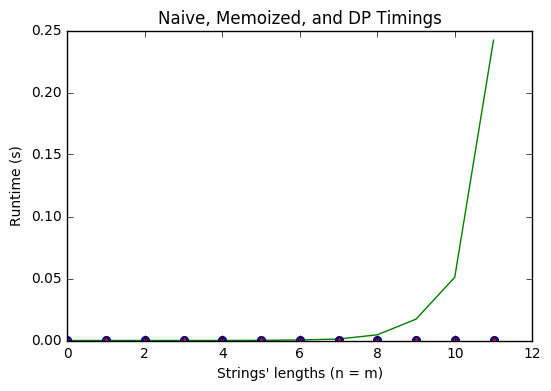

In [8]:
def plot_all_results(results):
    pyplot.title("Naive, Memoized, and DP Timings")
    pyplot.ylabel("Runtime (s)")
    pyplot.xlabel("Strings' lengths (n = m)")
    pyplot.plot(range(len(results)), [r[0] for r in results], 'g-')
    pyplot.plot(range(len(results)), [r[1] for r in results], 'bo')
    pyplot.plot(range(len(results)), [r[2] for r in results], 'r^')

def plot_no_naive_results(results):
    pyplot.title("Memoized and DP Timings")
    pyplot.ylabel("Runtime (s)")
    pyplot.xlabel("Strings' lengths (n = m)")
    #pyplot.plot(range(len(results)), [r[0] for r in results], 'g-')
    pyplot.plot(range(len(results)), [r[1] for r in results], 'bo')
    pyplot.plot(range(len(results)), [r[2] for r in results], 'r^')
    

plot_all_results(results)

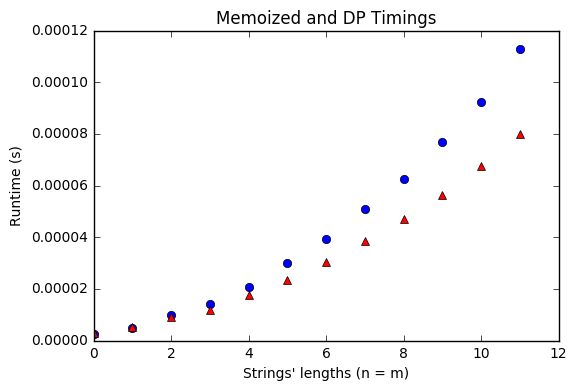

In [10]:
plot_no_naive_results(results)  # memoized in blue, DP in red